In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats  
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns      
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

Exercício 5

In [36]:
file_name = 'ex5.csv'

# Carregar o CSV, especificando o separador decimal (vírgula)
# e o caractere de citação (aspas duplas)
df = pd.read_csv(file_name, decimal=',', quotechar='"')

# Converter a coluna 'data' para o formato datetime
df['data'] = pd.to_datetime(df['data'], format='%m/%d/%Y')

# Definir a coluna 'data' como o índice do DataFrame
# (Isto é essencial para a análise de séries temporais)
df = df.set_index('data')


df = df.drop('id', axis=1)


#Aplicando suavização simples
model_ses = SimpleExpSmoothing(df['valor suav.simples'], initialization_method='estimated').fit()

df['SES_fitted'] = model_ses.fittedvalues

#Suavização Exponencial com Tendência (Holt)
model_holt = Holt(df['valor tendencia'],
                  initialization_method='estimated').fit()
# Salvar os valores ajustados
df['Holt_fitted'] = model_holt.fittedvalues

# Modelo 3: Suavização Exponencial Sazonal (Holt-Winters)
model_hw = ExponentialSmoothing(df['valor sazionalidade'],seasonal='add',seasonal_periods=12,initialization_method='estimated').fit()

df['HW_fitted'] = model_hw.fittedvalues






d:\Djo\Anaconda\envs\basic\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Djo\Anaconda\envs\basic\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Djo\Anaconda\envs\basic\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


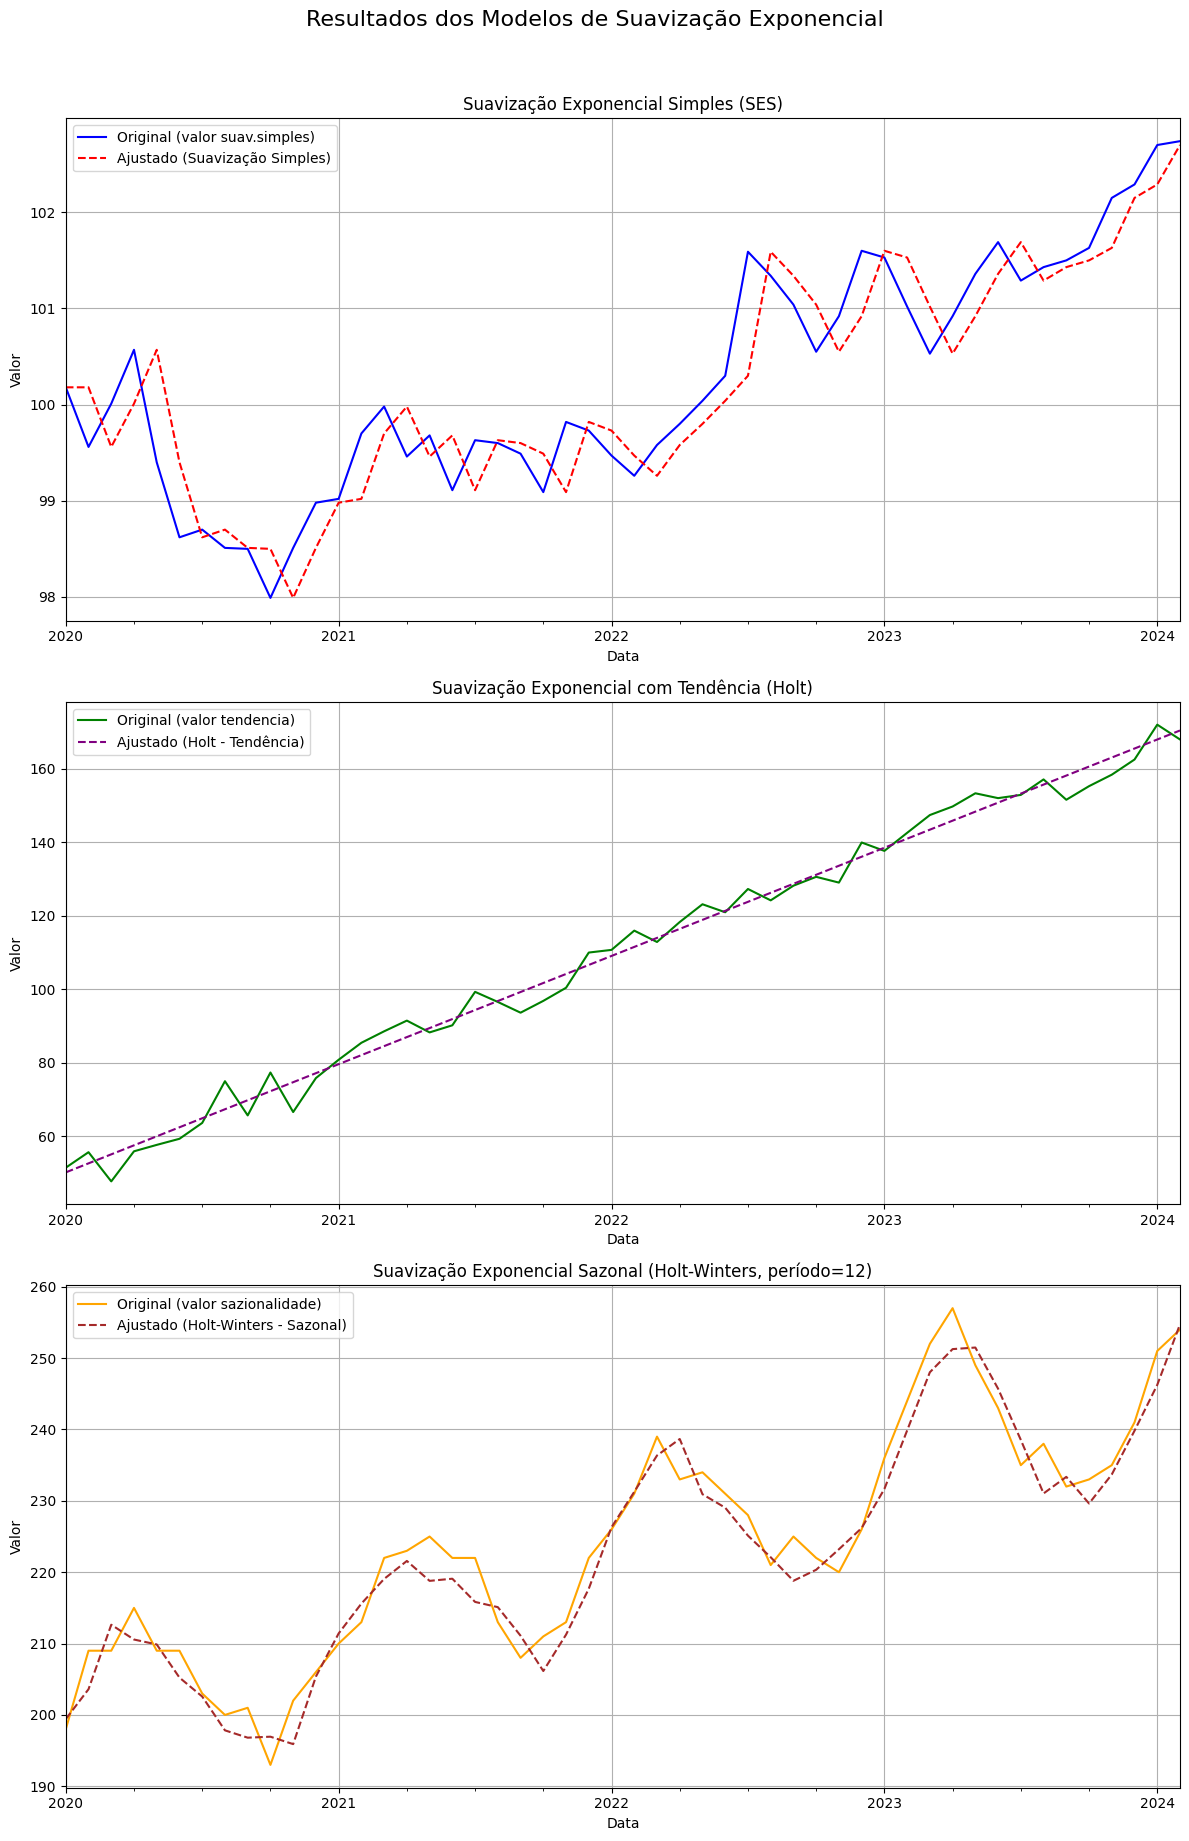

In [37]:
#Plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Resultados dos Modelos de Suavização Exponencial', fontsize=16, y=1.02)

# Plot 1: SES
df['valor suav.simples'].plot(ax=ax1, label='Original (valor suav.simples)', color='blue')
df['SES_fitted'].plot(ax=ax1, label='Ajustado (Suavização Simples)', linestyle='--', color='red')
ax1.set_title('Suavização Exponencial Simples (SES)')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor')
ax1.legend()
ax1.grid(True)

# Plot 2: Holt (Tendência)
df['valor tendencia'].plot(ax=ax2, label='Original (valor tendencia)', color='green')
df['Holt_fitted'].plot(ax=ax2, label='Ajustado (Holt - Tendência)', linestyle='--', color='purple')
ax2.set_title('Suavização Exponencial com Tendência (Holt)')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor')
ax2.legend()
ax2.grid(True)

# Plot 3: Holt-Winters (Sazonalidade)
df['valor sazionalidade'].plot(ax=ax3, label='Original (valor sazionalidade)', color='orange')
df['HW_fitted'].plot(ax=ax3, label='Ajustado (Holt-Winters - Sazonal)', linestyle='--', color='brown')
ax3.set_title('Suavização Exponencial Sazonal (Holt-Winters, período=12)')
ax3.set_xlabel('Data')
ax3.set_ylabel('Valor')
ax3.legend()
ax3.grid(True)

plt.tight_layout()




Exercício 6

Gráfico do Seaborn salvo como 'seaborn_regression_plot.png'

Resoluções
a) Coeficiente de Correlação (r): 0.8464

b) Equação: Y = 0.9476 + 0.0047 * X

c) Erro Padrão da Estimativa (RMSE): 0.4185

d) Cada variação em X implica em uma variação de 0,0047 em Y
e) P value: 1.3921e-39
Conclusão: O coeficiente angular é estatisticamente diferente de zero (p < 0.01). 

f) Para X=100, Y_previsto: 1.4162


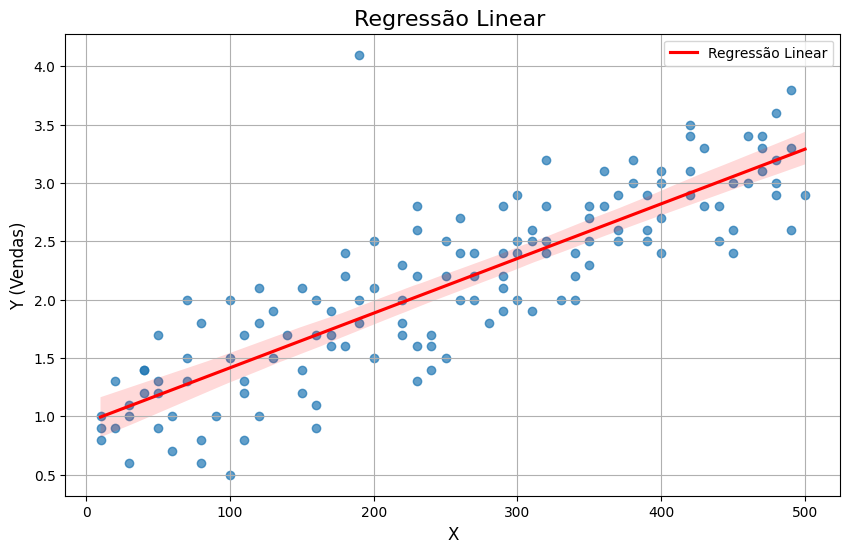

In [ ]:
file_name = 'ex6.csv'
df = pd.read_csv(file_name)
X = df['X']
Y = df['Y']


plt.figure(figsize=(10, 6))
sns.regplot(x='X', y='Y', data=df,line_kws={'color': 'red', 'label': 'Regressão Linear'},scatter_kws={'alpha': 0.7, 'label': 'Dados Originais'},ci=99) 

plt.title('Regressão Linear ', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y (Vendas)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('seaborn_regression_plot.png')
print("Gráfico do Seaborn salvo como 'seaborn_regression_plot.png'")



print("\nResoluções")

# a) Correlação
correlation_coef, _ = stats.pearsonr(X, Y)
print(f"a) Coeficiente de Correlação (r): {correlation_coef:.4f}\n")

X_sm = sm.add_constant(X)
model_results = sm.OLS(Y, X_sm).fit()

# b) Curva de Regressão
intercept = model_results.params['const']
slope = model_results.params['X']
print(f"b) Equação: Y = {intercept:.4f} + {slope:.4f} * X\n")

# c) Erro Padrão da Estimativa
std_error_estimate = np.sqrt(model_results.mse_resid)
print(f"c) Erro Padrão da Estimativa (RMSE): {std_error_estimate:.4f}\n")

# d) Porcentagem
print("d) Cada variação em X implica em uma variação de 0,0047 em Y \n")

# e) Teste de Significância (alpha=1%)
alpha = 0.01
p_value_slope = model_results.pvalues['X']

print(f"e) P value: {p_value_slope:.4e}")
if p_value_slope < alpha:
    print("Conclusão: O coeficiente angular é estatisticamente diferente de zero (p < 0.01). \n")
else:
    print("Conclusão: O coeficiente angular NÃO é significativamente diferente de zero (p >= 0.01).")

# f) Previsão para X=100
x_pred_val = 100
x_pred_sm = [1, x_pred_val] # [const, X]
prediction = model_results.predict(x_pred_sm)[0]
print(f"f) Para X=100, Y_previsto: {prediction:.4f}")

Exercício 7

In [47]:
file_name = 'ex7.csv'



# Seleção do melhor modelo

y = df['Preco']
potential_features = df.drop('Preco', axis=1).columns.tolist()
n_features = len(potential_features)

# Variáveis para armazenar o MELHOR modelo encontrado
best_adj_r2 = -np.inf  
best_features_combo = []
best_model_object = None

# O número total de combinações é 2^N - 1
total_combinations = 1 << n_features

# Loop
for i in range(1, total_combinations):
    
    current_combo = []
    
    # Construir o subconjunto atual 
    for j in range(n_features):
        if (i >> j) & 1:
            current_combo.append(potential_features[j])
            
    # Testando o modelo
    X_test = df[current_combo]
    X_test_sm = sm.add_constant(X_test)
    model = sm.OLS(y, X_test_sm).fit()
    
    current_adj_r2 = model.rsquared_adj
    
    # Salvar o melhor conjunto
    if current_adj_r2 > best_adj_r2:
        best_adj_r2 = current_adj_r2
        best_features_combo = current_combo
        best_model_object = model

# Modelo final

print(f"O modelo com o maior R² Ajustado: ({best_adj_r2:.4f}) ")
print(f"\nVariáveis selecionadas: {best_features_combo}")

print("\nSumário do Modelo de Regressão Final")
print(best_model_object.summary())

print("Todos as variáveis contribuem positivamente para o poder de explicação do modelo")



O modelo com o maior R² Ajustado: (0.9154) 

Variáveis selecionadas: ['Área', 'Quartos', 'Banheiros', 'Idade', 'Distancia_centro', 'Garagem', 'Indice_Escolas', 'Indice_Criminalidade', 'Zona_Norte', 'Zona_Sul', 'Zona_Leste']

Sumário do Modelo de Regressão Final
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     983.5
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:28:34   Log-Likelihood:                -13054.
No. Observations:                1000   AIC:                         2.613e+04
Df Residuals:                     988   BIC:                         2.619e+04
Df Model:                          11                                         
Covariance Type:           